<a href="https://colab.research.google.com/github/bibhu175/AI_ML/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 20.6MB/s 
     |████████████████████████████████| 3.1MB 36.6MB/s 
     |████████████████████████████████| 501kB 52.4MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [4]:
import keras

Using TensorFlow backend.


In [5]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow is already loaded. Please restart the runtime to change versions.


In [7]:
from __future__ import absolute_import,division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta1


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

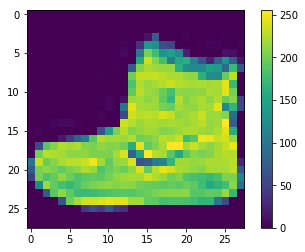

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

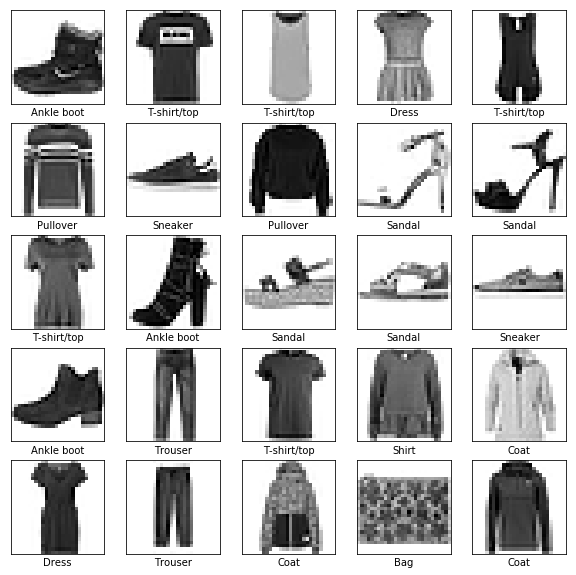

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images,train_labels, epochs=10)

W0901 13:34:26.213444 139661023463296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4931 - accuracy: 0.8270
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3725 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3358 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3113 - accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2936 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2796 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2681 - accuracy: 0.9015
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2569 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2465 - accuracy: 0.9087
Epoch 10/10
60

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3240 - accuracy: 0.8849

Test accuracy: 0.8849


In [0]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([8.1539820e-06, 1.5138456e-10, 1.1750118e-08, 4.6163585e-12,
       1.3619630e-06, 7.2266230e-05, 2.3786131e-06, 6.9835531e-03,
       5.1838880e-09, 9.9293232e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

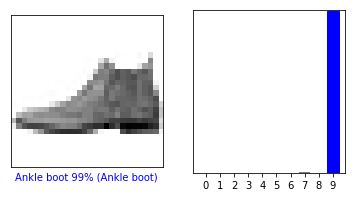

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

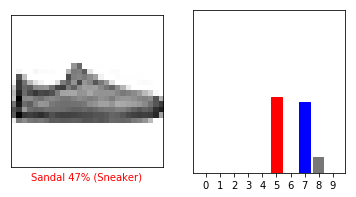

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

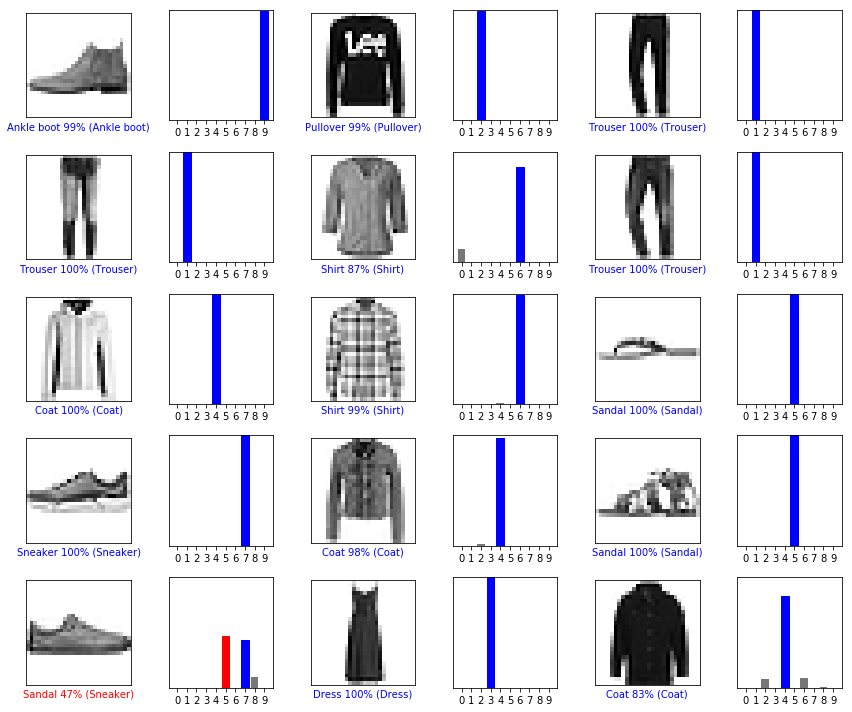

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.6756485e-04 2.0665612e-10 9.8769569e-01 2.3620755e-08 6.3195699e-03
  1.3164820e-12 5.6170956e-03 3.6588262e-18 5.3782099e-08 2.9735684e-13]]


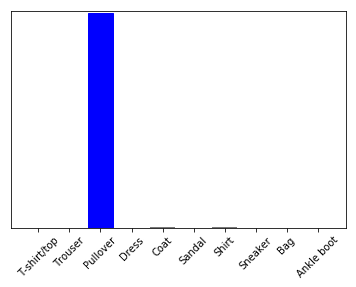

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

2